# Overview

With the proliferation of online ordering, curating a seamless and engaging digital shopping experience is an ongoing challenge. The entertainment industry, like many others, utilizes the online retail space with product offerings. Product managers must continuously analyze competitor offerings and identify opportunities for differentiation. Key factors such as ratings, price, category, and manufacturer play a crucial role in shaping product strategy and staying ahead of the competition.

This data collected from Amazon was uploaded to Kaggle by user ‘The Devastator’. The following is a data dictionary listing and describing the attributes in the data file.


- **product_name**: The name of the product. (String)

- **manufacturer:** The manufacturer of the product. (String)
- **price**: The price of the product in British Pounds. (String)
- **number_available_in_stock**: The number of the product available in stock. (String)
- **number_of_reviews**: The number of reviews for the product. (Integer)
- number_of_answered_questions: The number of questions answered for the product. (Integer)
- **average_review_rating**: The average review rating for the product. (String)
- **amazon_category_and_sub_category**: The Amazon category and subcategory for the product. (String)
- customers_who_bought_this_item_also_bought: The customers who bought this item also bought. (String)
- description: The description of the product. (String)
- product_information: The product information. (String)
- product_description: The product description. (String)
- items_customers_buy_after_viewing_this_item: The items customers buy after viewing this item. (String)
- customer_questions_and_answers: The customer questions and answers. (String)
- customer_reviews: The customer reviews. (String)
- sellers: The sellers. (String)

Question that can be answered from this data:

What are the best market entry points for product managers in the entertainment industry to infiltrate in Amazon’s Marketplace?


Source: https://www.kaggle.com/datasets/thedevastator/fashion-products-on-amazon-ratings-prices-and-pa


# Data Acquisition

In [385]:
%matplotlib inline

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import re
from scipy.sparse import lil_matrix
import scipy.spatial.distance
from sklearn import preprocessing

path='amazon_co-ecommerce_sample.csv'
df=pd.read_csv(path)
df.shape


(10000, 18)

# Data Preprocessing
On first glance, there are a number of attribute that can be ignored for this data analysis such as:
- unique ID
- number of reviews
- number of answered questions
- customers who bought this item also bought
- description
- product information
- product description
- items customers buy after viewing this item
- customer questions and answers
- customer reviews
- sellers

In addition, amazon category and sub category will be removed for this early analysis.


In [386]:
df.head()

,index,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [387]:

df=df.drop(['uniq_id', 'number_of_answered_questions', 'customers_who_bought_this_item_also_bought', 'description', 'product_description', 'items_customers_buy_after_viewing_this_item', 'customer_questions_and_answers', 'customer_reviews', 'sellers', 'product_information'], axis=1)
df=df.rename(columns={'index': 'product_id'})
df.shape

(10000, 8)

Now we are left with 10000 rows and 7 columns

## Data Exploration
There are a number of missing values in the stock, price, and review columns.
Due to the sheer size of this 10,000 row dataset, it would be best to remove those rows.
However, Missing in number of reviews may point to some interesting conclusions...

In [388]:
df.describe()


,product_id
count,10000.00000
mean,4999.50000
std,2886.89568
min,0.00000
25%,2499.75000
50%,4999.50000
75%,7499.25000
max,9999.00000


In [389]:
df.isna().sum()

product_id                             0
product_name                           0
manufacturer                           7
price                               1435
number_available_in_stock           2500
number_of_reviews                     18
average_review_rating                 18
amazon_category_and_sub_category     690
dtype: int64

## Data Cleaning 
Missing values, Correcting Datatypes, Handling Dupes
- drop Nan
- clean price
- clean column names

In [390]:
df.dropna(inplace=True)

In [391]:
df.isna().sum()


product_id                          0
product_name                        0
manufacturer                        0
price                               0
number_available_in_stock           0
number_of_reviews                   0
average_review_rating               0
amazon_category_and_sub_category    0
dtype: int64

In [392]:
df.shape

(5904, 8)

In [393]:
df=df.rename(columns={"number_available_in_stock": "stock_quant", "number_of_reviews": "num_reviews", "average_review_rating": "avg_rating", "amazon_category_and_sub_category":"category_subcategory"})


#df['num_reviews'] = pd.to_numeric(df['num_reviews'])
#count na values for other columns
df.head()

,product_id,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating,category_subcategory
0,0,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
2,2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
7,7,Hornby Santa's Express Train Set,Hornby,£69.93,3 new,36,4.3 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
8,8,Hornby Gauge Western Express Digital Train Set...,Hornby,£235.58,4 new,1,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...
10,10,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,£27.49,6 new,1,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...


In [394]:
df.shape

(5904, 8)

### Highlights Categories and Sub Categories

In [395]:
# Convert to DataFrame
df["category_subcategory"].value_counts()


category_subcategory
Die-Cast & Toy Vehicles > Toy Vehicles & Accessories > Scaled Models > Vehicles    589
Figures & Playsets > Science Fiction & Fantasy                                     327
Characters & Brands > Disney > Toys                                                254
Party Supplies > Decorations > Balloons                                            236
Party Supplies > Banners, Stickers & Confetti > Banners                            220
                                                                                  ... 
Medication & Remedies > Pain & Fever > Hot & Cold Therapies                          1
Sports Toys & Outdoor > Bikes, Trikes & Ride-ons > Scooters                          1
Baby & Toddler Toys > Activity Centres                                               1
Indoor Lighting > Specialty & Decorative Lighting                                    1
Novelty & Special Use > Novelty > Accessories > Buttons & Pins                       1
Name: count, Length: 2

In [396]:
pattern = r"^(.*?)\s?>\s?(.*)$"

# Apply regex to extract Category and Subcategory
df[['category', 'subcategory']] = df['category_subcategory'].str.extract(pattern)


df=df.drop('category_subcategory', axis=1)
df

,product_id,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating,category,subcategory
0,0,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,4.9 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
2,2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,3.9 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
7,7,Hornby Santa's Express Train Set,Hornby,£69.93,3 new,36,4.3 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
8,8,Hornby Gauge Western Express Digital Train Set...,Hornby,£235.58,4 new,1,5.0 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
10,10,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,£27.49,6 new,1,5.0 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
...,...,...,...,...,...,...,...,...,...
9993,9993,Playskool Heroes Super Hero Repulsor Drill Veh...,Super Heroes,£9.99,5 new,2,4.0 out of 5 stars,Hobbies,Collectible Figures & Memorabilia > Collectibl...
9995,9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,5.0 out of 5 stars,Hobbies,Collectible Figures & Memorabilia > Collectibl...
9997,9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,5.0 out of 5 stars,Novelty & Special Use,Novelty > Accessories > Buttons & Pins
9998,9998,Justice League of America Series 3 Green Lante...,DC Comics,£49.81,3 new,1,5.0 out of 5 stars,Hobbies,Collectible Figures & Memorabilia > Collectibl...


In [397]:
df['price'] = df['price'].astype(str).str.replace(r'[£,]', '', regex=True)

def avg_price(item):
    item=item.split("-")
    try:
        item= [float(x) for x in item]
    except ValueError:
        item= float('Nan')
        
    
    return np.mean(item)
df['price']=df['price'].apply(avg_price)
df['price'] = pd.to_numeric(df['price'])
df['price'].value_counts()


price
9.99     122
14.99     91
7.99      87
12.99     86
6.99      75
        ... 
39.23      1
36.80      1
16.54      1
22.04      1
21.20      1
Name: count, Length: 2240, dtype: int64

In [398]:

df['stock_quant'] = df['stock_quant'].astype(str).str.replace(r'[^0-9]', '', regex=True)
df['stock_quant'] = pd.to_numeric(df['stock_quant'])
df


,product_id,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating,category,subcategory
0,0,Hornby 2014 Catalogue,Hornby,3.42,5,15,4.9 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
2,2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17,3.9 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
7,7,Hornby Santa's Express Train Set,Hornby,69.93,3,36,4.3 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
8,8,Hornby Gauge Western Express Digital Train Set...,Hornby,235.58,4,1,5.0 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
10,10,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,27.49,6,1,5.0 out of 5 stars,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
...,...,...,...,...,...,...,...,...,...
9993,9993,Playskool Heroes Super Hero Repulsor Drill Veh...,Super Heroes,9.99,5,2,4.0 out of 5 stars,Hobbies,Collectible Figures & Memorabilia > Collectibl...
9995,9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5,3,5.0 out of 5 stars,Hobbies,Collectible Figures & Memorabilia > Collectibl...
9997,9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3,1,5.0 out of 5 stars,Novelty & Special Use,Novelty > Accessories > Buttons & Pins
9998,9998,Justice League of America Series 3 Green Lante...,DC Comics,49.81,3,1,5.0 out of 5 stars,Hobbies,Collectible Figures & Memorabilia > Collectibl...


In [399]:
df['avg_rating'] = df['avg_rating'].astype(str).str.replace(r'\s*out of 5 stars', '', regex=True)
df['avg_rating'] = pd.to_numeric(df['avg_rating'])

df['num_reviews']= df['num_reviews'].astype(str).str.replace(',', '')
df['num_reviews'] = pd.to_numeric(df['num_reviews'])
df=df.set_index('product_id')
df

,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating,category,subcategory
product_id,,,,,,,,
0,Hornby 2014 Catalogue,Hornby,3.42,5,15,4.9,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17,3.9,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
7,Hornby Santa's Express Train Set,Hornby,69.93,3,36,4.3,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
8,Hornby Gauge Western Express Digital Train Set...,Hornby,235.58,4,1,5.0,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
10,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,27.49,6,1,5.0,Hobbies,Model Trains & Railway Sets > Rail Vehicles > ...
...,...,...,...,...,...,...,...,...
9993,Playskool Heroes Super Hero Repulsor Drill Veh...,Super Heroes,9.99,5,2,4.0,Hobbies,Collectible Figures & Memorabilia > Collectibl...
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5,3,5.0,Hobbies,Collectible Figures & Memorabilia > Collectibl...
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3,1,5.0,Novelty & Special Use,Novelty > Accessories > Buttons & Pins


# Prelim Data Visualisations and Distribution

### Summary
After preliminary cleaning, we are left with 5,904 rows rows of Amazon shopping data we can see that there is:


In [400]:
df.describe()

,price,stock_quant,num_reviews,avg_rating
count,5904.000000,5904.000000,5904.000000,5904.000000
mean,20.008723,8.444783,11.044885,4.694258
std,47.495742,8.436407,40.018527,0.369077
min,0.290000,1.000000,1.000000,2.300000
25%,5.440000,3.000000,1.000000,4.475000
50%,10.990000,5.000000,2.000000,4.900000
75%,19.990000,11.000000,8.000000,5.000000
max,2439.920000,92.000000,1399.000000,5.000000


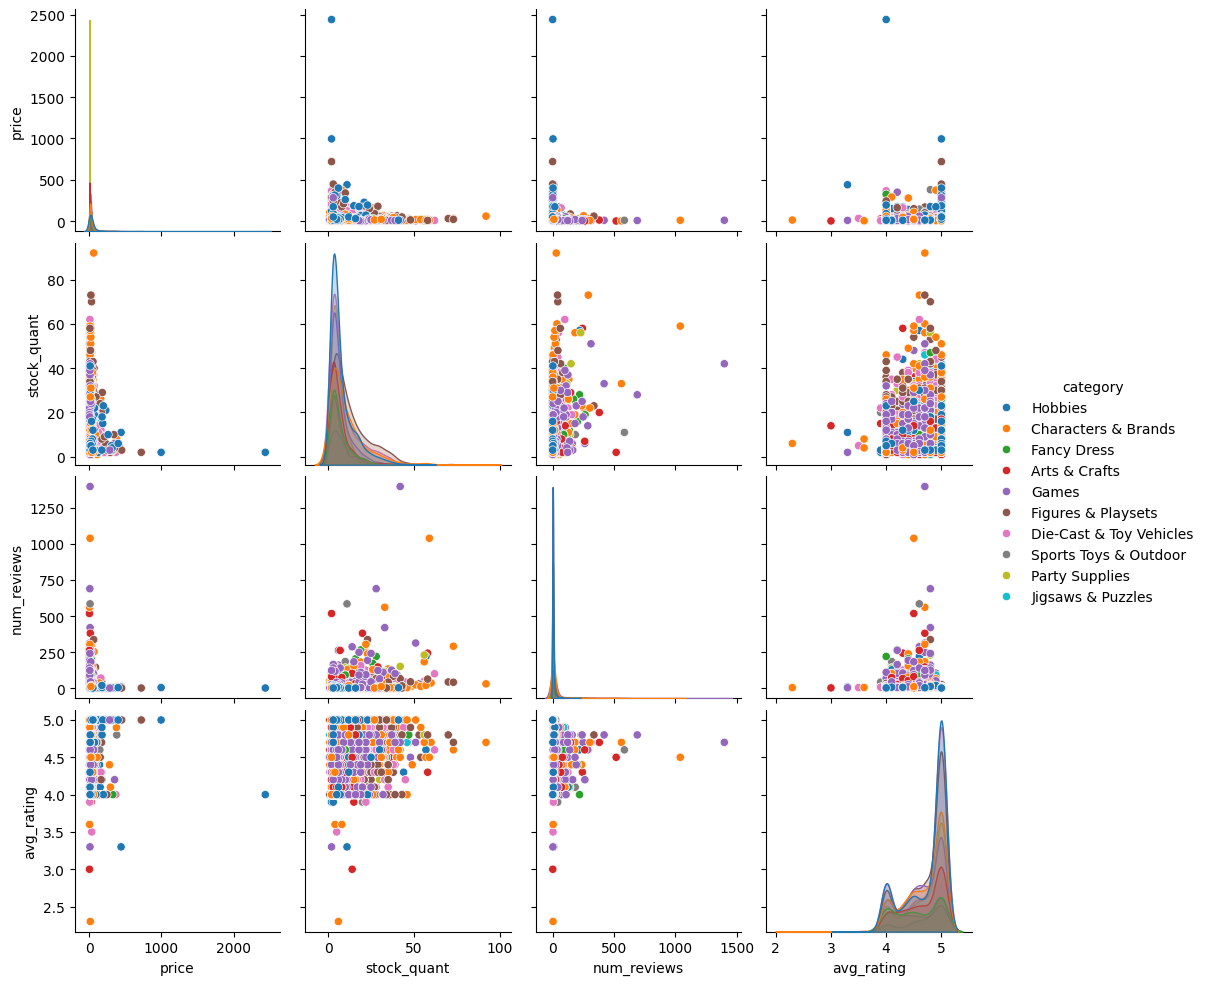

In [401]:
#pairwise plot to check correlation values pre normalisation encoding

#sns.pairplot(df, hue='category')
plt.show()

catedf=df['category'].value_counts().reset_index()

cateList=catedf['category'].to_list()
top10=cateList[:10]

sns.pairplot(df[df['category'].isin(top10)], hue='category')
plt.show()

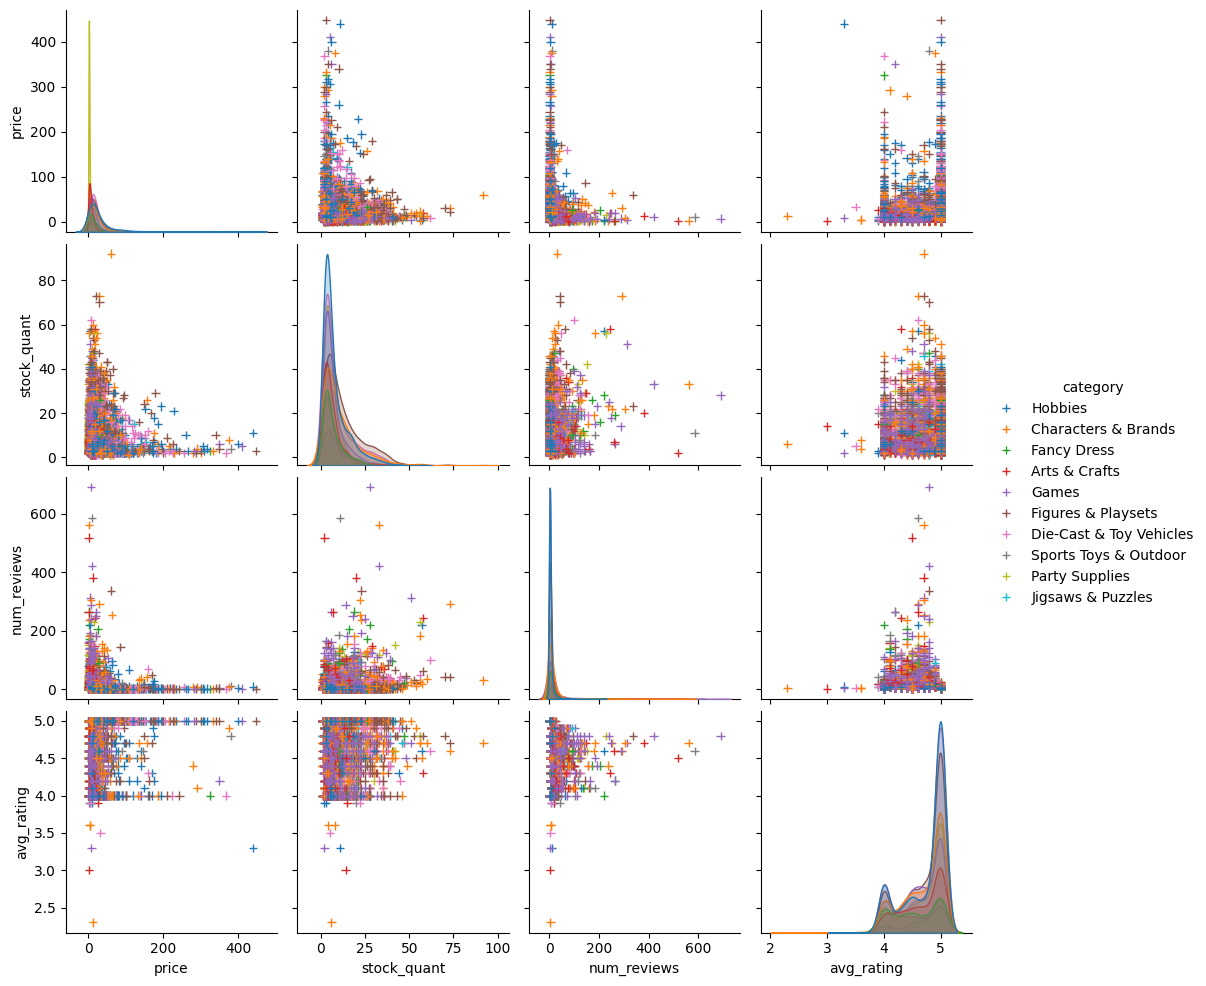

In [402]:

df = df[df['price'] <=500]
df = df[df['num_reviews'] <=750]


sns.pairplot(df[df['category'].isin(top10)], hue='category', plot_kws=dict(marker="+", linewidth=1))
plt.show()

### Normalizing Category Attribute

In [403]:
df=df.drop('subcategory', axis=1)

In [404]:
cdf = pd.get_dummies(df, columns=['category'], prefix='', prefix_sep='', dtype=float)
cdf


,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating,Arts & Crafts,Baby & Toddler Toys,Bags,Bedding & Linens,...,Office Supplies,Party Supplies,"Pens, Pencils & Writing Supplies",Pretend Play,Puppets & Puppet Theatres,Sex & Sensuality,Sports Toys & Outdoor,"Sweets, Chocolate & Gum",Women,Worlds Apart
product_id,,,,,,,,,,,,,,,,,,,,,
0,Hornby 2014 Catalogue,Hornby,3.42,5,15,4.9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17,3.9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Hornby Santa's Express Train Set,Hornby,69.93,3,36,4.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Hornby Gauge Western Express Digital Train Set...,Hornby,235.58,4,1,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,27.49,6,1,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,Playskool Heroes Super Hero Repulsor Drill Veh...,Super Heroes,9.99,5,2,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5,3,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3,1,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Data Preprocessing
Normalizing price, stock quant num reviews and avg rating using Z-score normalization.


In [405]:

cols=['price', 'stock_quant', 'num_reviews', 'avg_rating']

scaler = preprocessing.StandardScaler().fit_transform(cdf[cols])

#df[cols] = scaler.fit_transform(df[cols])

scaler = pd.DataFrame(scaler, columns = cols)

cdf=scaler.join(cdf.reset_index(), lsuffix='_scaled').drop(cols, axis=1)

cdf=cdf.set_index('product_id')


cdf


,price_scaled,stock_quant_scaled,num_reviews_scaled,avg_rating_scaled,product_name,manufacturer,Arts & Crafts,Baby & Toddler Toys,Bags,Bedding & Linens,...,Office Supplies,Party Supplies,"Pens, Pencils & Writing Supplies",Pretend Play,Puppets & Puppet Theatres,Sex & Sensuality,Sports Toys & Outdoor,"Sweets, Chocolate & Gum",Women,Worlds Apart
product_id,,,,,,,,,,,,,,,,,,,,,
0,-0.497861,-0.408830,0.142820,0.557257,Hornby 2014 Catalogue,Hornby,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.292151,-0.765915,0.206374,-2.152309,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.584598,-0.646886,0.810141,-1.068482,Hornby Santa's Express Train Set,Hornby,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,6.771176,-0.527858,-0.302061,0.828214,Hornby Gauge Western Express Digital Train Set...,Hornby,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.255782,-0.289801,-0.302061,0.828214,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,-0.292151,-0.408830,-0.270284,-1.881352,Playskool Heroes Super Hero Repulsor Drill Veh...,Super Heroes,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9995,0.113633,-0.408830,-0.238507,0.828214,Batman 1966 TV Series Action Figures - The Rid...,Mattel,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.772405,-0.646886,-0.302061,0.828214,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [406]:
cdf.columns

Index(['price_scaled', 'stock_quant_scaled', 'num_reviews_scaled',
       'avg_rating_scaled', 'product_name', 'manufacturer', 'Arts & Crafts',
       'Baby & Toddler Toys', 'Bags', 'Bedding & Linens', 'Camping & Hiking',
       'Characters & Brands', 'Cooking & Dining', 'Die-Cast & Toy Vehicles',
       'Dogs', 'Dolls & Accessories', 'Educational Toys', 'Electronic Toys',
       'Fancy Dress', 'Figures & Playsets', 'Games', 'Gardening',
       'Handbags & Shoulder Bags', 'Hobbies', 'Home Accessories',
       'Indoor Lighting', 'Jigsaws & Puzzles', 'Medication & Remedies', 'Men',
       'Musical Toy Instruments', 'Novelty & Special Use', 'Office Supplies',
       'Party Supplies', 'Pens, Pencils & Writing Supplies', 'Pretend Play',
       'Puppets & Puppet Theatres', 'Sex & Sensuality',
       'Sports Toys & Outdoor', 'Sweets, Chocolate & Gum', 'Women',
       'Worlds Apart'],
      dtype='object')

In [407]:
cdf=cdf.drop( ['product_name', 'manufacturer'], axis=1)
#separating manu and product name for cosine 
cdf

,price_scaled,stock_quant_scaled,num_reviews_scaled,avg_rating_scaled,Arts & Crafts,Baby & Toddler Toys,Bags,Bedding & Linens,Camping & Hiking,Characters & Brands,...,Office Supplies,Party Supplies,"Pens, Pencils & Writing Supplies",Pretend Play,Puppets & Puppet Theatres,Sex & Sensuality,Sports Toys & Outdoor,"Sweets, Chocolate & Gum",Women,Worlds Apart
product_id,,,,,,,,,,,,,,,,,,,,,
0,-0.497861,-0.408830,0.142820,0.557257,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.292151,-0.765915,0.206374,-2.152309,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.584598,-0.646886,0.810141,-1.068482,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,6.771176,-0.527858,-0.302061,0.828214,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.255782,-0.289801,-0.302061,0.828214,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,-0.292151,-0.408830,-0.270284,-1.881352,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9995,0.113633,-0.408830,-0.238507,0.828214,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.772405,-0.646886,-0.302061,0.828214,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Analysis + Insights


For items most similar to 1078: 

In [408]:
import sklearn
distances=sklearn.metrics.pairwise.cosine_distances(cdf).flatten()
query_distances=list(zip(cdf.index,distances))


### Clustering


In [409]:
"""cdf['cscore']=0
for id, cscore in query_distances:
    cdf.loc[id, 'cscore']= cscore
cdf['cscore']
cdf"""

"cdf['cscore']=0\nfor id, cscore in query_distances:\n    cdf.loc[id, 'cscore']= cscore\ncdf['cscore']\ncdf"

In [410]:
clustering = sklearn.cluster.AgglomerativeClustering(
    metric='cosine',
    linkage='average',
    n_clusters=5
)

clusters = clustering.fit_predict(cdf)
df['cluster'] = clusters


In [411]:
df['cluster'].value_counts()

cluster
0    2955
2    1495
1     858
3     301
4     289
Name: count, dtype: int64

In [412]:
df

,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating,category,cluster
product_id,,,,,,,,
0,Hornby 2014 Catalogue,Hornby,3.42,5,15,4.9,Hobbies,0
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17,3.9,Hobbies,2
7,Hornby Santa's Express Train Set,Hornby,69.93,3,36,4.3,Hobbies,3
8,Hornby Gauge Western Express Digital Train Set...,Hornby,235.58,4,1,5.0,Hobbies,3
10,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,27.49,6,1,5.0,Hobbies,0
...,...,...,...,...,...,...,...,...
9993,Playskool Heroes Super Hero Repulsor Drill Veh...,Super Heroes,9.99,5,2,4.0,Hobbies,2
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5,3,5.0,Hobbies,0
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3,1,5.0,Novelty & Special Use,3


## Visualising Clusters

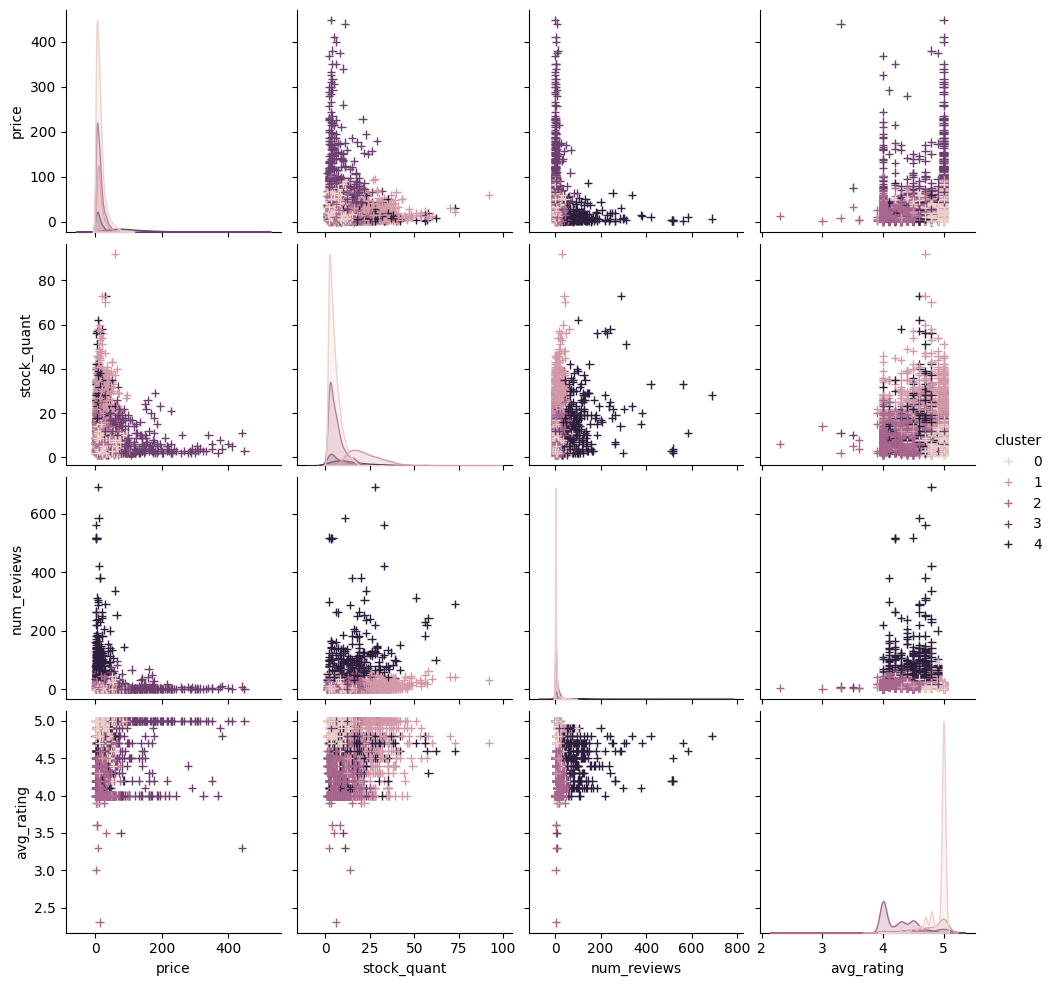

In [413]:
sns.pairplot(df[['price', 'stock_quant', 'num_reviews', 'avg_rating', 'cluster']], hue='cluster',
             plot_kws=dict(marker="+", linewidth=1))
plt.show()

### A closer look
Identifying products in cluster 2 and cluster 4

In [414]:
df

,product_name,manufacturer,price,stock_quant,num_reviews,avg_rating,category,cluster
product_id,,,,,,,,
0,Hornby 2014 Catalogue,Hornby,3.42,5,15,4.9,Hobbies,0
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,9.99,2,17,3.9,Hobbies,2
7,Hornby Santa's Express Train Set,Hornby,69.93,3,36,4.3,Hobbies,3
8,Hornby Gauge Western Express Digital Train Set...,Hornby,235.58,4,1,5.0,Hobbies,3
10,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,Hornby,27.49,6,1,5.0,Hobbies,0
...,...,...,...,...,...,...,...,...
9993,Playskool Heroes Super Hero Repulsor Drill Veh...,Super Heroes,9.99,5,2,4.0,Hobbies,2
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,22.95,5,3,5.0,Hobbies,0
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,43.99,3,1,5.0,Novelty & Special Use,3


Avg price in cluster? 

In [ ]:
cateCount=pd.DataFrame(df.groupby('cluster')['category'].value_counts()).reset_index()

In [ ]:

cateCount[(cateCount['cluster']==2 )| (cateCount['cluster']==4)]

,cluster,category,count
36,2,Games,219
37,2,Figures & Playsets,191
38,2,Characters & Brands,189
39,2,Party Supplies,162
40,2,Die-Cast & Toy Vehicles,160
41,2,Arts & Crafts,131
42,2,Hobbies,115
43,2,Sports Toys & Outdoor,95
44,2,Fancy Dress,68
45,2,Dolls & Accessories,49


In [423]:
cateCount[(cateCount['cluster']==0 )| (cateCount['cluster']==4)]

,cluster,category,count
0,0,Hobbies,461
1,0,Die-Cast & Toy Vehicles,448
2,0,Party Supplies,337
3,0,Games,294
4,0,Characters & Brands,287
5,0,Figures & Playsets,258
6,0,Arts & Crafts,218
7,0,Fancy Dress,168
8,0,Puppets & Puppet Theatres,125
9,0,Sports Toys & Outdoor,123


In [425]:
df.groupby('cluster')

In [426]:
grouped=df.groupby('cluster')

for cluster, group in grouped:
    print(f"\n Cluster {cluster}")
    products=group.sample(n=5).index
    for product in products:
        print(product)


 Cluster 0
9967
1311
439
2701
122

 Cluster 1
6477
5425
6962
1146
3867

 Cluster 2
2058
9986
866
5057
3813

 Cluster 3
2712
6426
2623
9559
827

 Cluster 4
6601
1211
1546
9789
9016


In [ ]:
#cluster 0
df.loc[439]

product_name    Learning Resources Foam Number Dice
manufacturer                     Learning Resources
price                                           4.0
stock_quant                                       4
num_reviews                                       7
avg_rating                                      4.7
category                                      Games
cluster                                           0
Name: 439, dtype: object

In [428]:
#cluster 4
df.loc[9016]

product_name    Star Wars X-Wing Miniatures Game
manufacturer                           Star Wars
price                                       23.2
stock_quant                                   26
num_reviews                                  129
avg_rating                                   4.7
category                     Characters & Brands
cluster                                        4
Name: 9016, dtype: object

In [430]:
df.loc[1146]

product_name    A Nightmare on Elm Street - Freddy Krueger Bob...
manufacturer                                        Wacky Wobbler
price                                                       12.99
stock_quant                                                    14
num_reviews                                                     9
avg_rating                                                    4.3
category                                                  Hobbies
cluster                                                         1
Name: 1146, dtype: object

In [433]:
df.loc[6426]

product_name    Square Enix Deus Ex: Human Revolution Play Art...
manufacturer                                          Square Enix
price                                                      162.01
stock_quant                                                     4
num_reviews                                                     2
avg_rating                                                    4.0
category                                       Figures & Playsets
cluster                                                         3
Name: 6426, dtype: object

### Exporting for Tableau

In [429]:

df.to_csv('clustered_products.csv', index=True)
